In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emnist/emnist-letters-mapping.txt
/kaggle/input/emnist/emnist-letters-test.csv
/kaggle/input/emnist/emnist-mnist-mapping.txt
/kaggle/input/emnist/emnist-digits-train.csv
/kaggle/input/emnist/emnist-bymerge-mapping.txt
/kaggle/input/emnist/emnist-balanced-train.csv
/kaggle/input/emnist/emnist-digits-test.csv
/kaggle/input/emnist/emnist-balanced-test.csv
/kaggle/input/emnist/emnist-mnist-test.csv
/kaggle/input/emnist/emnist-letters-train.csv
/kaggle/input/emnist/emnist-byclass-train.csv
/kaggle/input/emnist/emnist-bymerge-test.csv
/kaggle/input/emnist/emnist-balanced-mapping.txt
/kaggle/input/emnist/emnist-mnist-train.csv
/kaggle/input/emnist/emnist-digits-mapping.txt
/kaggle/input/emnist/emnist-bymerge-train.csv
/kaggle/input/emnist/emnist-byclass-test.csv
/kaggle/input/emnist/emnist-byclass-mapping.txt
/kaggle/input/emnist/emnist_source_files/emnist-digits-test-labels-idx1-ubyte
/kaggle/input/emnist/emnist_source_files/emnist-bymerge-train-labels-idx1-ubyte
/kaggle/input/

In [2]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
import tensorflow as tf
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import time


2024-11-24 12:48:15.864612: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 12:48:15.864786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 12:48:16.017376: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Load the balanced training dataset
balanced_train = pd.read_csv("../input/emnist/emnist-balanced-train.csv")
# Load the balanced testing dataset
balanced_test = pd.read_csv("../input/emnist/emnist-balanced-test.csv")
# Load the mapping
mapp = pd.read_csv("../input/emnist/emnist-balanced-mapping.txt", delimiter=' ', index_col=0, header=None)

In [4]:
#printing shapes 
print(f"""
Train: {balanced_train.shape}
Test:  {balanced_test.shape}
Map:   {mapp.shape}
""")


Train: (112799, 785)
Test:  (18799, 785)
Map:   (47, 1)



In [5]:
# Create keys as integers from 0 to the length of the mapping values
keys = range(len(mapp[1].values)) 

# Convert the integer values to corresponding characters using ASCII
values = [chr(v) for v in mapp[1].values]

# Create a dictionary mapping integers to characters
map_dict = dict(zip(keys, values))
map_dict

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [6]:
#splliting target coloumn and features from train and test dataset
#training
X_train = np.array(balanced_train.iloc[:,1:].values)
y_train = np.array(balanced_train.iloc[:,0].values)

#testing
X_test = np.array(balanced_test.iloc[:,1:].values)
y_test = np.array(balanced_test.iloc[:,0].values)

print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 784)
y_train: (112799,)
x_test: (18799, 784)
y_test: (18799,)


In [7]:
#displaying the no of classes
column_name = '45'
if column_name in balanced_train.columns:
    classes = len(balanced_train[column_name].unique())
    print(f"number of classes  : {classes}") 
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

number of classes  : 47


In [8]:
#storing no of classes in classes variable for input size for output layers
classes = len(balanced_train['45'].unique()) 
print('number of classes : ', classes) 

number of classes :  47


In [9]:
def rotate_emnist(x_data):
    
    x_data = x_data.reshape(x_data.shape[0], 28, 28)
    x_data = np.transpose(x_data,(0,2,1))
    
    return(x_data)

X_train = rotate_emnist(X_train)
X_test = rotate_emnist(X_test)

In [10]:
# Normalise and reshape data
X_train = X_train.astype('float32')  / 255.0
X_test = X_test.astype('float32')  / 255.0

In [11]:
# One hot encoding
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (112799, 28, 28)
y_train: (112799, 47)
x_test: (18799, 28, 28)
y_test: (18799, 47)


# Create the MLP+MLP Model

In [12]:
# Flatten the images from 28x28 dimensions and normalize them
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (112799, 784)
y_train :  (112799, 47)
x_test  :  (18799, 784)
y_test  :  (18799, 47)


In [ ]:
# Define the model
model0 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model0.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the hidden layer with 32 units and ReLU activation function
model0.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model0.add(tf.keras.layers.Dropout(0.3))

# Add the hidden layer with 32 units and ReLU activation function
model0.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model0.add(tf.keras.layers.Dropout(0.3))

# Output layer: Using softmax activation for multi-class classification.
model0.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model0.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model0.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,543 (416.18 KB)

 Trainable params: 106,543 (416.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size  = 32
epochs      = 330

start_time0 = time.time()
history0 = model0.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time0 = time.time()

# Calculate elapsed time
elapsed_time0 = stop_time0 - start_time0
minutes0 = int(elapsed_time0 // 60)
seconds0 = int(elapsed_time0 % 60)

# Print time used in minutes and seconds
print(f'training_time0 = {minutes0} min {seconds0} sec')

Epoch 1/16
 108/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0284 - loss: 3.8561

I0000 00:00:1732452521.706106     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1732452521.717179     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1763/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1881 - loss: 3.2655

W0000 00:00:1732452525.450805     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1732452525.948633     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_accuracy improved from -inf to 0.55907, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1882 - loss: 3.2652 - val_accuracy: 0.5591 - val_loss: 1.8094
Epoch 2/16
  76/1763 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4657 - loss: 1.9949

W0000 00:00:1732452526.631919     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1751/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4923 - loss: 1.8830
Epoch 2: val_accuracy improved from 0.55907 to 0.61562, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4925 - loss: 1.8823 - val_accuracy: 0.6156 - val_loss: 1.4476
Epoch 3/16
1759/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5577 - loss: 1.5844
Epoch 3: val_accuracy improved from 0.61562 to 0.64057, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5578 - loss: 1.5843 - val_accuracy: 0.6406 - val_loss: 1.3029
Epoch 4/16
1758/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5918 - loss: 1.4444
Epoch 4: val_accuracy improved from 0.64057 to 0.66110, saving model to Best_points.keras
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5918 - loss: 1.4443 - val_accuracy: 0.6611 - val_loss: 1.2166
Epoch 5/16
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6162 - loss: 1.3555
Epoch 5: val_accuracy improved f

In [ ]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('Best_points.keras')

# Evaluate the model on the test dataset
score = best_model.evaluate(X_test, y_test, verbose=0)

# Print the evaluation results
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

W0000 00:00:1732452568.920396     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test loss     : 0.8386
Test accuracy : 0.7547


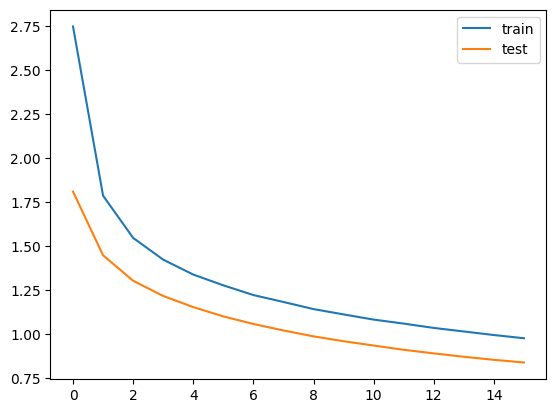

In [18]:
plt.plot(history0.history['loss'], label='train')
plt.plot(history0.history['val_loss'], label='test')
plt.legend()

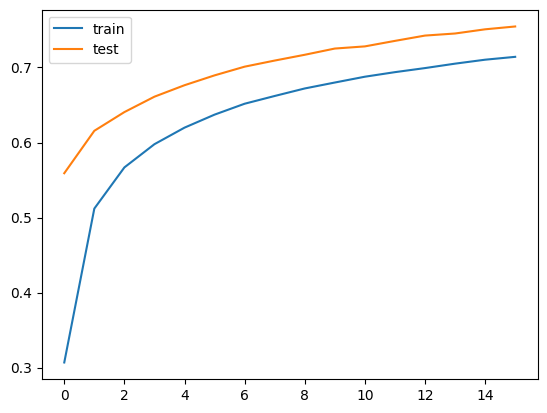

In [19]:
plt.plot(history0.history['accuracy'], label='train')
plt.plot(history0.history['val_accuracy'], label='test')
plt.legend()